Implementing K-Means Clustering on Customer Segments

Task: Apply K-Means clustering to the Mall Customers dataset to segment customers based on their annual income and spending score. 

Visualize the resulting clusters.


In [36]:
import pandas as pd
df=pd.read_csv('Mall_customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [37]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Genre']= encoder.fit_transform(df['Genre'])

In [39]:
X=df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [40]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
standardized_features=scaler.fit_transform(X)


In [41]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=6, n_init=10, max_iter=300, random_state=0)
kmean.fit(standardized_features)
identified_clusters = kmean.predict(standardized_features)

Text(0.5, 1.0, 'K-Means Clustering')

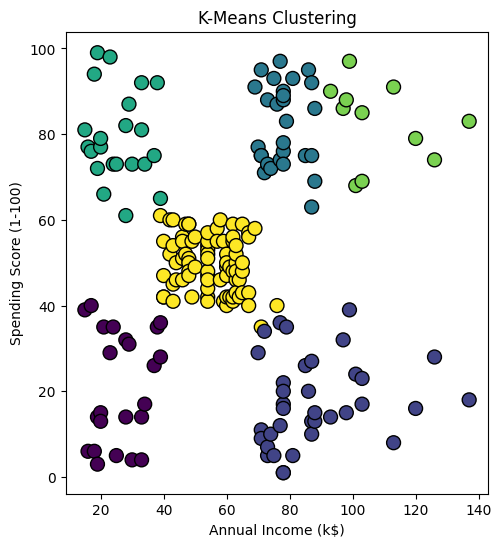

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=identified_clusters, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')




Optimal Number of Clusters: Elbow Method and Silhouette Score

Task: Use the Elbow Method and Silhouette Score to find the optimal number of clusters for the Mall Customers dataset. 

Discuss the criteria for selecting the number of clusters.


 We identify the point where the WCSS starts to flatten out, forming an elbow-like shape. This point indicates the optimal number of clusters, where the WCSS begins to decrease more slowly. 


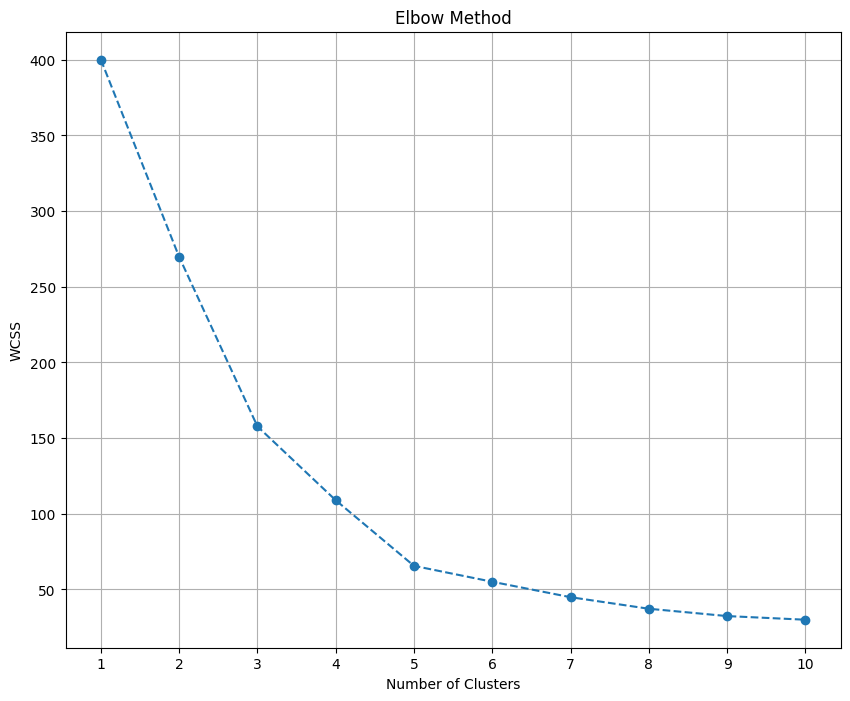

In [43]:
wcss = []
for i in range(1, 11):
    kmean = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmean.fit(standardized_features)
    wcss.append(kmean.inertia_)
print(" We identify the point where the WCSS starts to flatten out, forming an elbow-like shape. This point indicates the optimal number of clusters, where the WCSS begins to decrease more slowly. ")
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In the Silhouette Score plot, we identify the peak to determine the optimal number of clusters,  as the value at this peak typically represents the best cluster count. Higher Silhouette Scores indicate better-defined clusters.


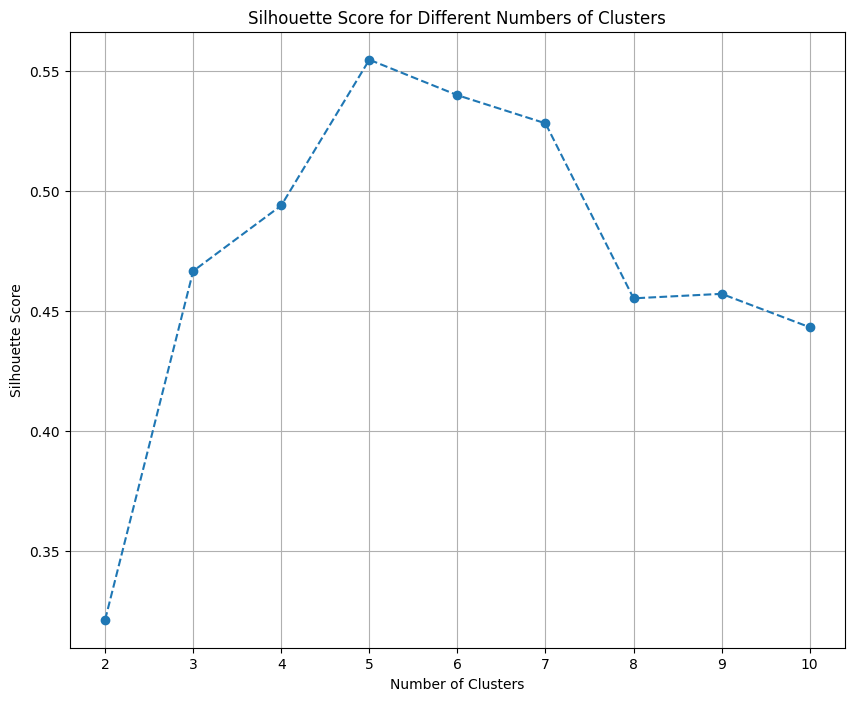

In [44]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmean = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmean.fit(standardized_features)
    labels = kmean.labels_
    score = silhouette_score(standardized_features, labels)
    silhouette_scores.append(score)

print("In the Silhouette Score plot, we identify the peak to determine the optimal number of clusters,  as the value at this peak typically represents the best cluster count. Higher Silhouette Scores indicate better-defined clusters.")

plt.figure(figsize=(10, 8))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()


Cluster Profiling and Insights

Task: Analyze the characteristics of the clusters formed in the Mall Customers dataset.

 Provide insights into the customer segments based on their spending behavior and income levels.


In [45]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=5, n_init=10, max_iter=300, random_state=0)
kmean.fit(standardized_features)
cluster_labels = kmean.fit_predict(standardized_features)


Text(0.5, 1.0, 'K-Means Clustering')

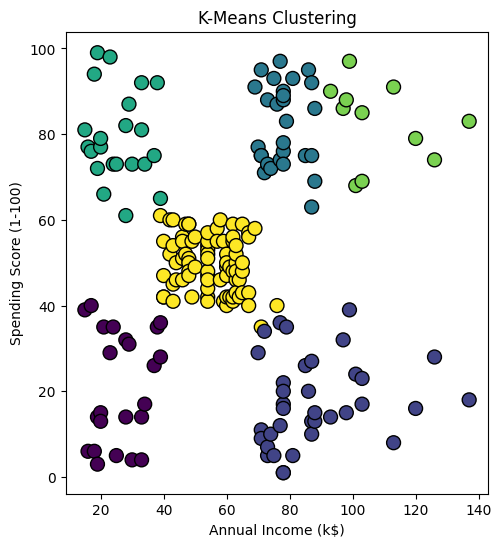

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=identified_clusters, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')




In [47]:
df['Cluster'] = cluster_labels


In [48]:
cluster = df.groupby('Cluster').mean()
print(cluster)


         CustomerID     Genre        Age  Annual Income (k$)  \
Cluster                                                        
0         86.320988  0.407407  42.716049           55.296296   
1        162.000000  0.461538  32.692308           86.538462   
2        164.371429  0.542857  41.114286           88.200000   
3         23.000000  0.391304  45.217391           26.304348   
4         23.090909  0.409091  25.272727           25.727273   

         Spending Score (1-100)  
Cluster                          
0                     49.518519  
1                     82.128205  
2                     17.114286  
3                     20.913043  
4                     79.363636  


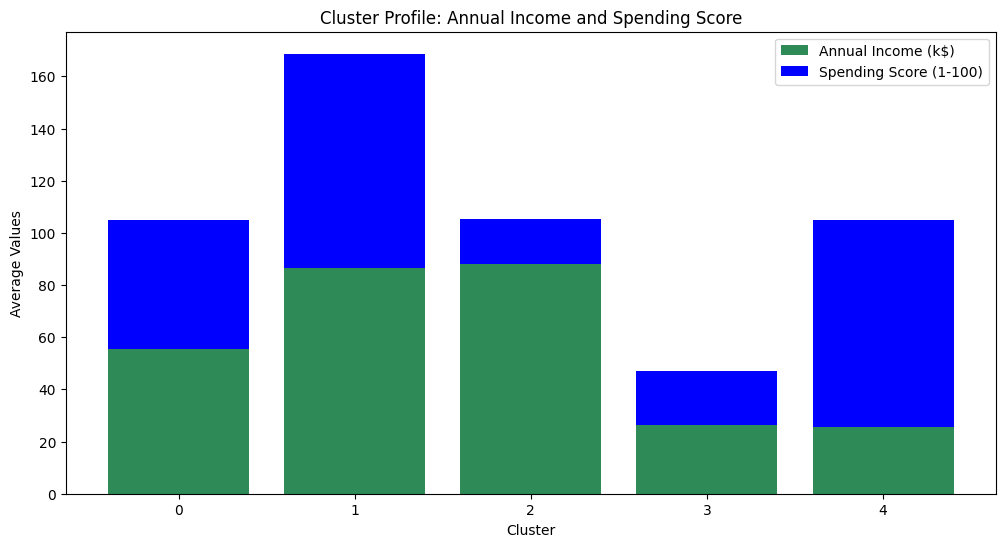

In [49]:
plt.figure(figsize=(12, 6))
plt.bar(cluster.index, cluster['Annual Income (k$)'], color='seagreen', label='Annual Income (k$)')
plt.bar(cluster.index, cluster['Spending Score (1-100)'], color='blue', label='Spending Score (1-100)', bottom=cluster['Annual Income (k$)'])
plt.xlabel('Cluster')
plt.ylabel('Average Values')
plt.title('Cluster Profile: Annual Income and Spending Score')
plt.xticks(cluster.index)
plt.legend()
plt.show()

Hierarchical Clustering for Customer Segmentation

Task: Implement hierarchical clustering on the Mall Customers dataset. 

Compare the clusters formed with those obtained from K-Means and discuss the differences.


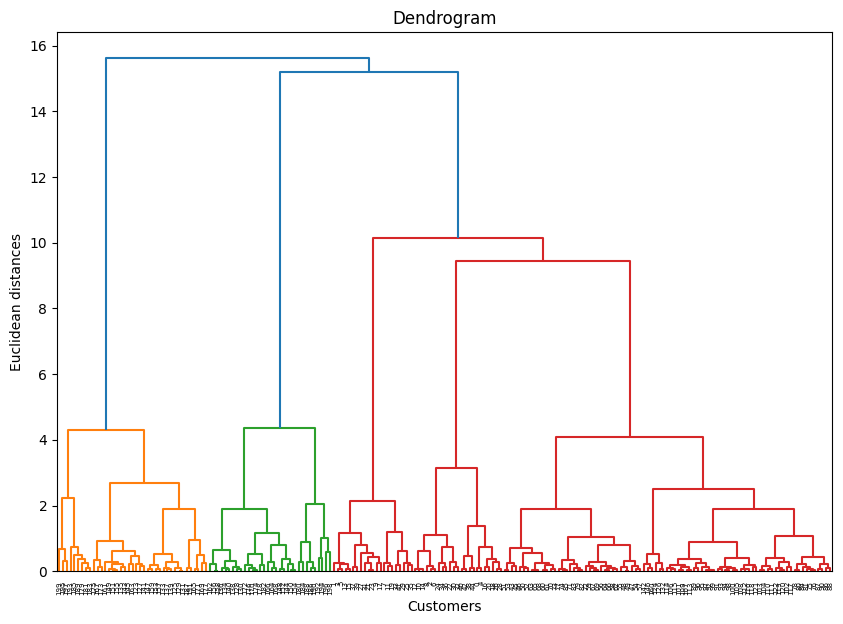

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(standardized_features, method='ward')

plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
dendrogram(Z)
plt.show()

In [51]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster_labels = hc.fit_predict(standardized_features)

df['Cluster'] = cluster_labels


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


         CustomerID     Genre        Age  Annual Income (k$)  \
Cluster                                                        
0        166.250000  0.562500  41.000000           89.406250   
1        162.000000  0.461538  32.692308           86.538462   
2         87.894118  0.400000  42.482353           55.811765   
3         22.000000  0.428571  25.333333           25.095238   
4         23.000000  0.391304  45.217391           26.304348   

         Spending Score (1-100)  
Cluster                          
0                     15.593750  
1                     82.128205  
2                     49.129412  
3                     80.047619  
4                     20.913043  


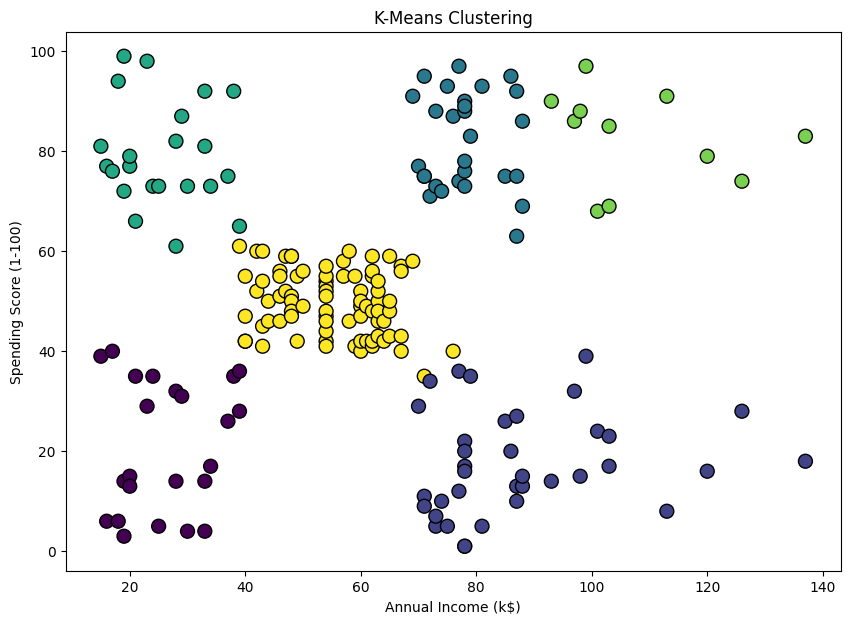

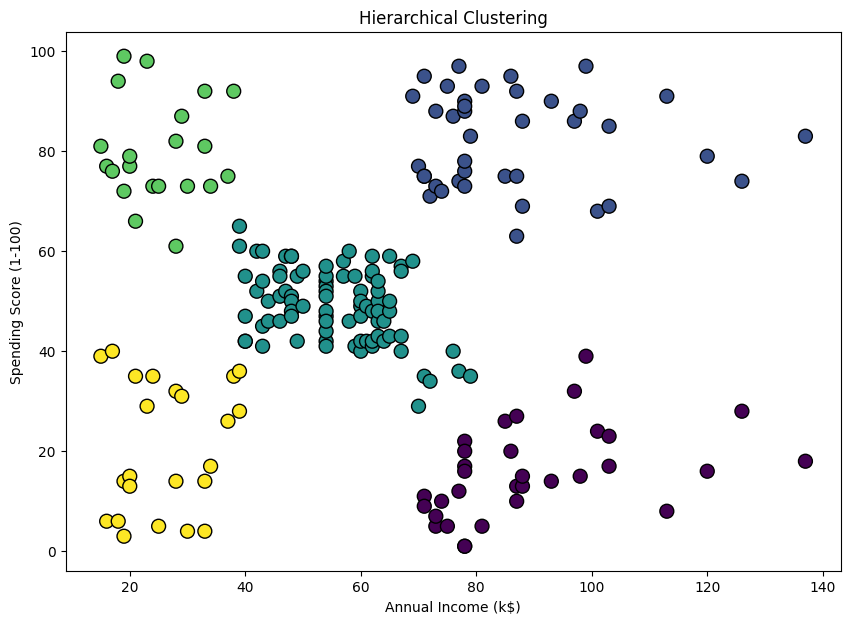

In [57]:
cluster_profile = df.groupby('Cluster').mean()
print(cluster_profile)

plt.figure(figsize=(10, 7))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=identified_clusters, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')


plt.figure(figsize=(10, 7))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Hierarchical Clustering')
plt.show()




Visualizing Clusters with PCA

Task: Apply PCA to the Mall Customers dataset to reduce its dimensionality. 

Visualize the clusters from both K-Means and hierarchical clustering in the PCA-reduced space.


In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
standardized_pca = pca.fit_transform(standardized_features)
pca_features = pca.fit_transform(standardized_features)

pca_df = pd.DataFrame(data=pca_features, columns=['PCA1', 'PCA2'])


In [54]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=5, random_state=10)
kmeans_labels = kmean.fit_predict(standardized_features)

pca_df['KMeans_Cluster'] = kmeans_labels


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [55]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hc_labels = hc.fit_predict(standardized_features)

pca_df['HC_Cluster'] = hc_labels


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


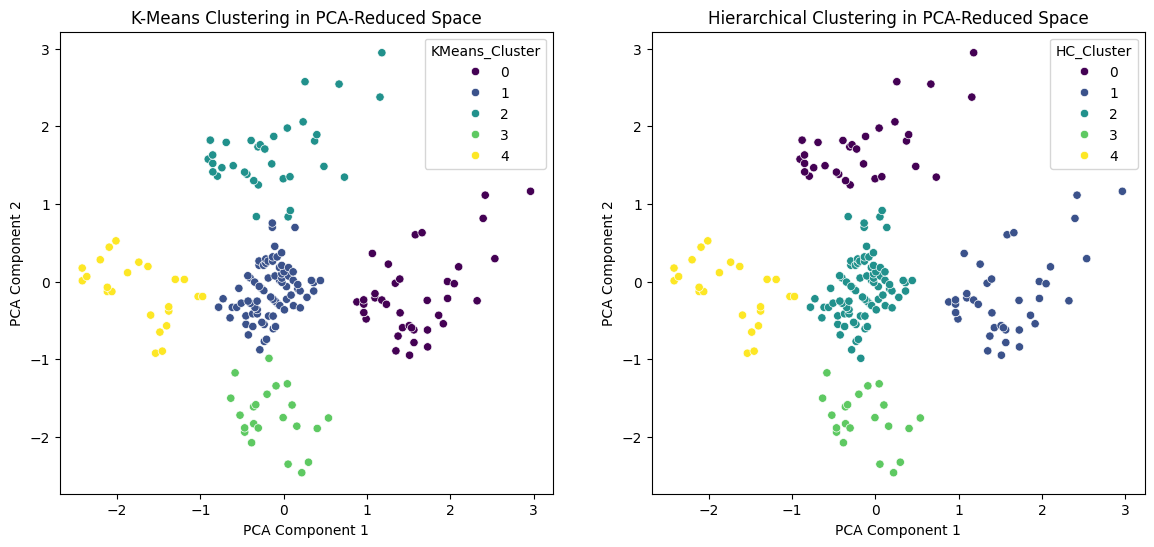

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='viridis', data=pca_df, legend='full')
plt.title('K-Means Clustering in PCA-Reduced Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.subplot(1, 2, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='HC_Cluster', palette='viridis', data=pca_df, legend='full')
plt.title('Hierarchical Clustering in PCA-Reduced Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.show()
